# <center>Прогноз оттока клиентов из телеком-компании</center>

В этом проекте целью является выявление оттока клиентов, то есть клиентов, наиболее вероятных для отмены подписки на фиктивную телекоммуникационную компанию. Это действительно интересная проблема, потому что если бы вы могли заранее предсказать, какие клиенты рискуют уйти, вы могли бы уменьшить усилия по удержанию клиентов, направляя их на таких клиентов, обеспечивая адекватное вмешательство, чтобы побудить их остаться и свести к минимуму уход клиентов.

Набор данных для этого упражнения связывает особенности учетной записи и использования для клиентов с оттоком и без оттока. Телекоммуникационный набор данных был получен из публичного репозитория OpenML. Это задача контролируемой классификации, и алгоритмы машинного обучения будут использоваться для разработки прогнозных моделей и оценки точности и производительности. Он стремится найти наиболее подходящую модель для бизнеса.

Каждая строка представляет собой одного клиента - это **объект** исследования.  
Столбцы - **признаки** объекта.


Описание признаков объекта:  
**State** - Буквенный код штата, номинальный признак  
**Account length** - Общее время, в течение которого клиент обслуживается компанией, количественный признак  
**Area code** - Префикс номера телефона, количественный признак   
**International plan** - Международный роуминг, бинарный признак (подключен/не подключен)  
**Voice mail plan** - Голосовая почта, бинарный признак (подключена/не подключена)  
**Number vmail messages** - Количество голосовых сообщений, количественный признак  
**Total day minutes** - Общая длительность разговоров днем, количественный признак  
**Total day calls** - Общее количество звонков днем, количественный признак  
**Total day charge** - Общая сумма оплаты за услуги днем, количественный признак  
**Total eve minutes** - Общая длительность разговоров вечером, количественный признак  
**Total eve calls** - Общее количество звонков вечером, количественный признак  
**Total eve charge** - Общая сумма оплаты за услуги вечером, количественный признак  
**Total night minutes** - Общая длительность разговоров ночью, количественный признак  
**Total night calls** - Общее количество звонков ночью, количественный признак  
**Total night charge** - Общая сумма оплаты за услуги ночью, количественный признак  
**Total intl minutes** - Общая длительность международных разговоров, количественный признак  
**Total intl calls** - Общее количество  международных разговоров, количественный признак  
**Total intl charge** -  Общая сумма оплаты за международные разговоры, количественный   признак  
**Customer service calls** - Количество обращений в сервисный центр, количественный признак 
  
Целевая переменная: **Churn** - Признак оттока, бинарный признак (1 - потеря клиента, то есть отток)  

In [30]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
cm = sns.light_palette("pink", as_cmap=True)
try: from sprint import sprint
except: sprint = lambda df, **noUse: df.style.background_gradient(cmap=cm)
from tqdm import tqdm_notebook as tqdm

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.style as style
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
RANDOM_STATE = 17

In [2]:
# Чтение файла
df = pd.read_csv('data/telecom_churn.csv')
sprint(df.head(10), color_negative_red_set=['Voice mail plan', 'International plan'], redFlagValue=["no"])

,State,Account length,Area code,Phone number,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.100000,110,45.070000,197.400000,99,16.780000,244.700000,91,11.010000,10.000000,3,2.700000,1,False
1,OH,107,415,371-7191,no,yes,26,161.600000,123,27.470000,195.500000,103,16.620000,254.400000,103,11.450000,13.700000,3,3.700000,1,False
2,NJ,137,415,358-1921,no,no,0,243.400000,114,41.380000,121.200000,110,10.300000,162.600000,104,7.320000,12.200000,5,3.290000,0,False
3,OH,84,408,375-9999,yes,no,0,299.400000,71,50.900000,61.900000,88,5.260000,196.900000,89,8.860000,6.600000,7,1.780000,2,False
4,OK,75,415,330-6626,yes,no,0,166.700000,113,28.340000,148.300000,122,12.610000,186.900000,121,8.410000,10.100000,3,2.730000,3,False
5,AL,118,510,391-8027,yes,no,0,223.400000,98,37.980000,220.600000,101,18.750000,203.900000,118,9.180000,6.300000,6,1.700000,0,False
6,MA,121,510,355-9993,no,yes,24,218.200000,88,37.090000,348.500000,108,29.620000,212.600000,118,9.570000,7.500000,7,2.030000,3,False
7,MO,147,415,329-9001,yes,no,0,157.000000,79,26.690000,103.100000,94,8.760000,211.800000,96,9.530000,7.100000,6,1.920000,0,False
8,LA,117,408,335-4719,no,no,0,184.500000,97,31.370000,351.600000,80,29.890000,215.800000,90,9.710000,8.700000,4,2.350000,1,False
9,WV,141,415,330-8173,yes,yes,37,258.600000,84,43.960000,222.000000,111,18.870000,326.400000,97,14.690000,11.200000,5,3.020000,0,False


Каждая строка представляет собой одного клиента - это **объект** исследования.  
Столбцы - **признаки** объекта.


Описание признаков объекта:  
**State** - Буквенный код штата, номинальный признак  
**Account length** - Общее время, в течение которого клиент обслуживается компанией, количественный признак  
**Area code** - Префикс номера телефона, количественный признак   
**International plan** - Международный роуминг, бинарный признак (подключен/не подключен)  
**Voice mail plan** - Голосовая почта, бинарный признак (подключена/не подключена)  
**Number vmail messages** - Количество голосовых сообщений, количественный признак  
**Total day minutes** - Общая длительность разговоров днем, количественный признак  
**Total day calls** - Общее количество звонков днем, количественный признак  
**Total day charge** - Общая сумма оплаты за услуги днем, количественный признак  
**Total eve minutes** - Общая длительность разговоров вечером, количественный признак  
**Total eve calls** - Общее количество звонков вечером, количественный признак  
**Total eve charge** - Общая сумма оплаты за услуги вечером, количественный признак  
**Total night minutes** - Общая длительность разговоров ночью, количественный признак  
**Total night calls** - Общее количество звонков ночью, количественный признак  
**Total night charge** - Общая сумма оплаты за услуги ночью, количественный признак  
**Total intl minutes** - Общая длительность международных разговоров, количественный признак  
**Total intl calls** - Общее количество  международных разговоров, количественный признак  
**Total intl charge** -  Общая сумма оплаты за международные разговоры, количественный   признак  
**Customer service calls** - Количество обращений в сервисный центр, количественный признак 
  
Целевая переменная: **Churn** - Признак оттока, бинарный признак (1 - потеря клиента, то есть отток)  

### <center>Предобработка данных</center>

In [3]:
# Тип данных признаков 'International plan' и 'Voice mail plan' - объекты,
# нужно преобразовать  в булевый тип.
obj_cols = ['International plan', 'Voice mail plan']
df[obj_cols] = df[obj_cols] == 'Yes'

In [4]:
# Преобразование номинального признака названия штата в количественный
state_encoder = preprocessing.LabelEncoder()
state_encoder.fit(df['State'])
df['State'] = state_encoder.transform(df['State']).astype("float64")

###  <center>Первичный анализ признаков</center>

In [5]:
#Просмотр типов данных
df.info()
# Все данные заполнены, пропусков нет.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   float64
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   Phone number            3333 non-null   object 
 4   International plan      3333 non-null   bool   
 5   Voice mail plan         3333 non-null   bool   
 6   Number vmail messages   3333 non-null   int64  
 7   Total day minutes       3333 non-null   float64
 8   Total day calls         3333 non-null   int64  
 9   Total day charge        3333 non-null   float64
 10  Total eve minutes       3333 non-null   float64
 11  Total eve calls         3333 non-null   int64  
 12  Total eve charge        3333 non-null   float64
 13  Total night minutes     3333 non-null   float64
 14  Total night calls       3333 non-null   

In [6]:
# Смотрим на статистические характеристики:
sprint(df.describe().drop('count', axis=0))

,State,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
mean,26.059406,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,14.824911,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,0.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,26.000000,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,39.000000,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,50.000000,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


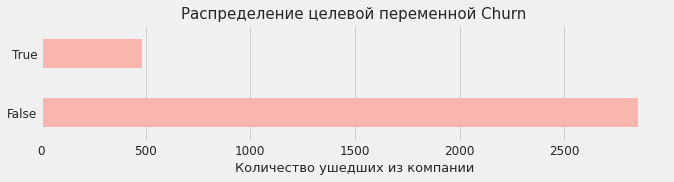

In [7]:
# Распределение целевой переменной #
plt.style.use('fivethirtyeight')
df['Churn'].value_counts().plot.barh(figsize=(10,2), fontsize=12, colormap='Pastel1')
plt.xlabel('Количество ушедших из компании', fontsize=13)
plt.title('Распределение целевой переменной Churn', fontsize=15)
plt.gca().yaxis.grid(False) # del x-line



Выборка не сбалансированна, одного класса больше чем другого.

### <center>Первичный визуальный анализ признаков </center>

In [8]:
# Анализируемые признаки (переменная создана для удобства предварительного анализа)
predictors = [
#  'State',
 'Account length',
#  'Area code',
# 'International plan',
# 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
#  'Churn'
]

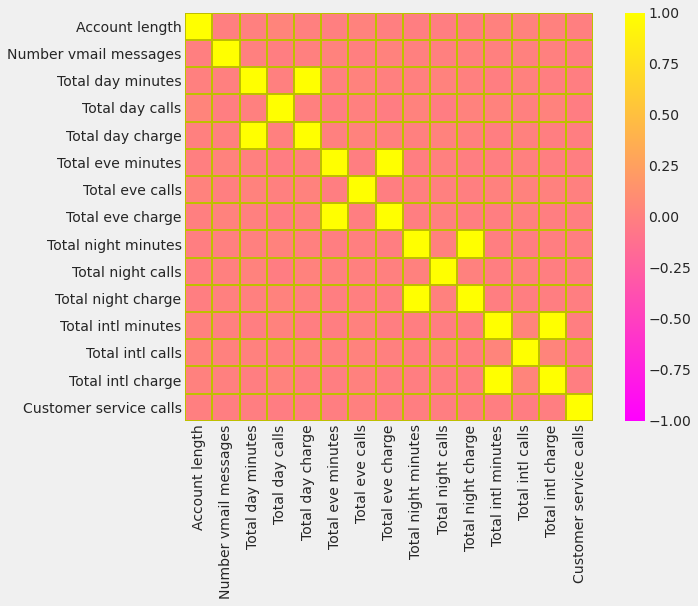

In [20]:
# Ищем коррелирующие признаки
corr = df[predictors].corr()

fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(corr, annot=False, cmap='spring',
                linewidths=1, linecolor='y', square=True,
                mask=False, vmin=-1, vmax=1, )

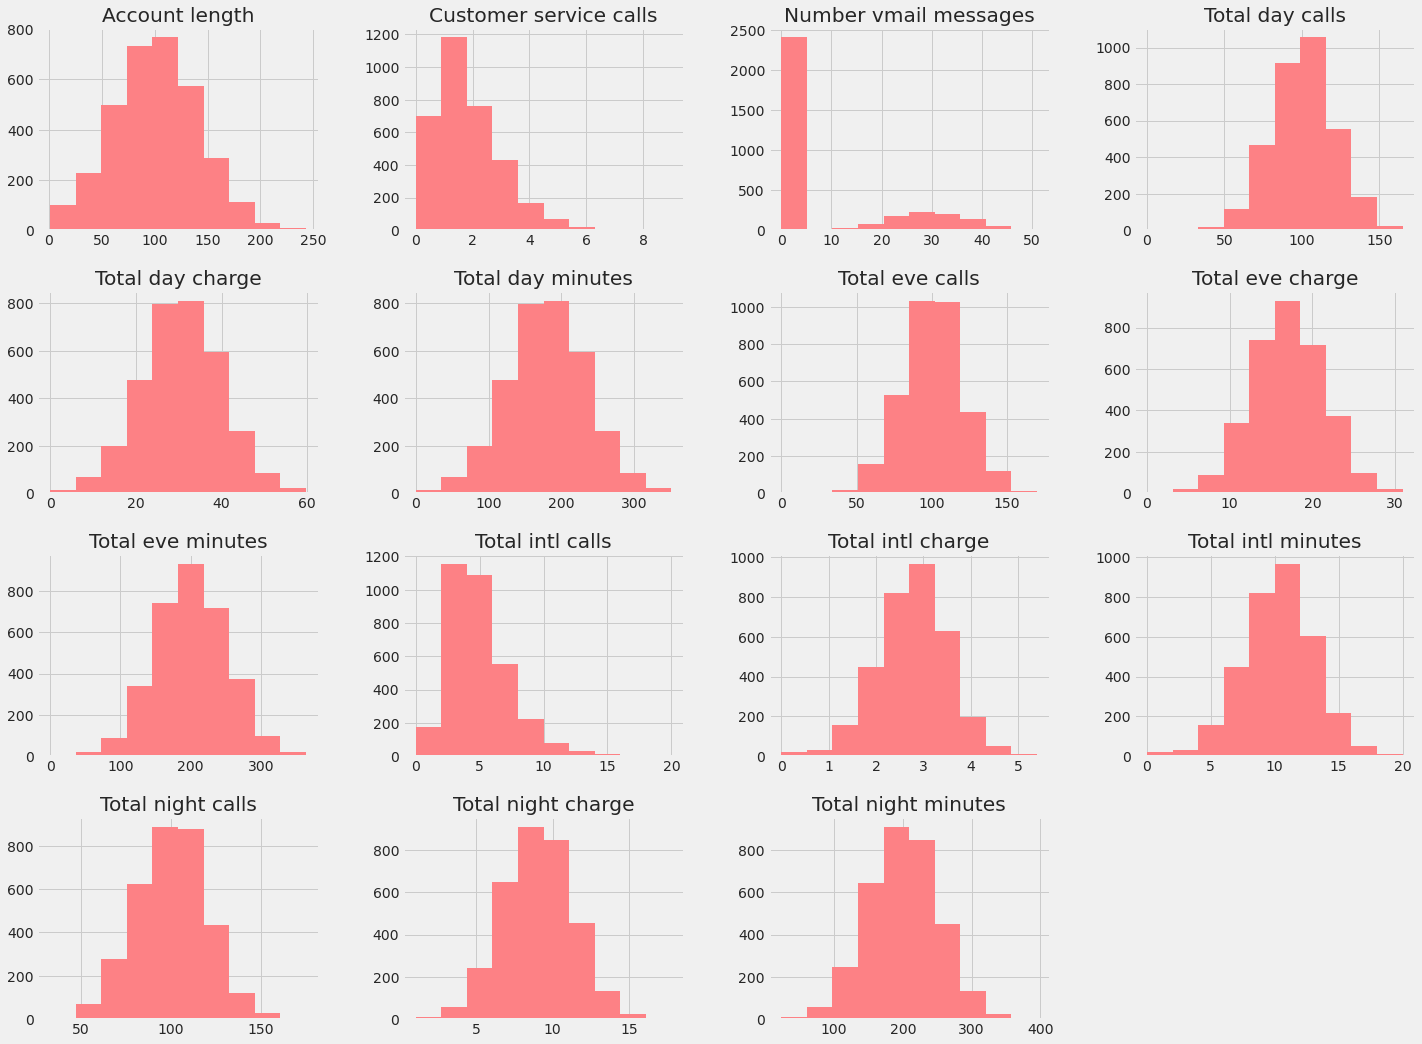

In [38]:
# Строим графики распределения признаков
plots = df[predictors].hist(figsize=(22,17), color='#FD8185', )

### <center>Закономерности:</center>
1. На первый взгляд величина среднего количества звонков в разное время суток наблюдается на одном уровне, средняя продолжительность звонков вечером и ночью в среднем все-таки больше. Это соответствует действительности и логично, поскольку люди чаще совершают продолжительные звонки в свободное от работы и учебы время, а днем большинство совершаются кратковременные деловые звонки.
2. Несмотря на то что средняя продолжительность разговоров увеличивается по мере смены времени суток (вечером и ночью больше, чем днем), мы можем наблюдать, что среднее количество звонков остается на прежнем уровне. Но при этом сумма оплаты разговоров снижается, что, вероятно, связанно с повременным тарифом, т.е. в разное время суток, разная тарификация.
3. Средняя продолжительность международных звонков небольшая. Это связанно с дорогими тарифами на роуминг.

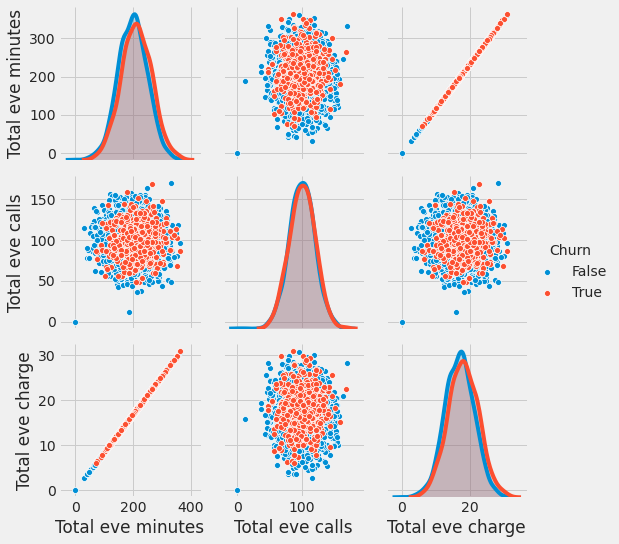

In [40]:
# Пробуем найти влияние количества звонков, общей продолжительности и суммы оплаты.
# Берем вечерний период, так как он самый активный. 
sns.pairplot(df[['Total eve minutes', 'Total eve calls', 'Total eve charge',
                 'Churn']], hue='Churn');

# Зависимости не выявлено, отток клиентов по этим параметрам равномерен.
# Наблюдается линейная зависимость суммы оплаты от общей продолжительности разговоров.

Основываясь на экспертном мнении, можно предположить, что на отток клиента может сильно влиять общее время обслуживания клиента и количество обращений в сервисный центр. Пробуем выявить зависимость.

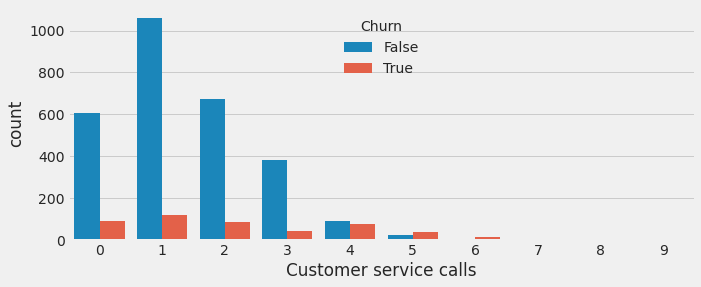

In [27]:
# Зависимость признака оттока от количества обращений в сервисный центр
fig=plt.gcf()
fig.set_size_inches(10,4)
sns.countplot(x='Customer service calls', hue="Churn", data=df);

Подсчитаем долю вышедших в отток клиентов от не вышедших и
долю вышедших в отток от суммы всех клиентов в определенном количестве звонков.

Построим линейные графики.

In [13]:
true_service_calls = df[df['Churn'] == True].groupby('Customer service calls')['Churn'].count()
false_service_calls = df[df['Churn'] == False].groupby('Customer service calls')['Churn'].count()
ratio = true_service_calls / false_service_calls * 100
ratio_all = true_service_calls / (true_service_calls + false_service_calls) * 100

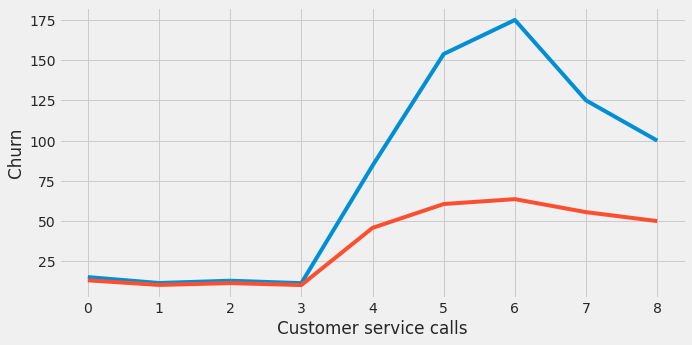

In [19]:
plt.figure(figsize=(10,5))
plt.plot(ratio)
plt.plot(ratio_all)
plt.xlabel('Customer service calls')
plt.ylabel('Churn')
plt.show()

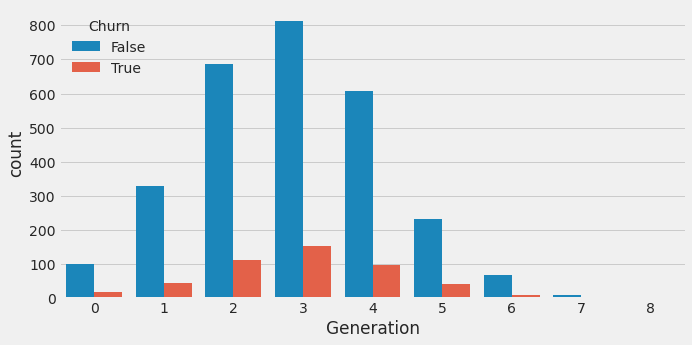

In [21]:
# Так как продолжительность является количественным и непрерывным признаком,
# то для упрощения визуализации разделим клиентов на несколько 'поколений'.
plt.figure(figsize=(10,5))
df['Generation'] = df['Account length'].apply(lambda x: x//30)
sns.countplot(x='Generation', hue="Churn", data=df);

Подсчитаем доли вышедших в отток клиентов от не вышедших и
долю вышедших в отток от суммы всех клиентов по поколениям.

Построим линейные графики.

In [22]:
true_generation = df[df['Churn'] == True].groupby('Generation')['Churn'].count()
false_generation = df[df['Churn'] == False].groupby('Generation')['Churn'].count()
ratio = true_generation / false_generation * 100
ratio_all = true_generation / (true_generation + false_generation) * 100

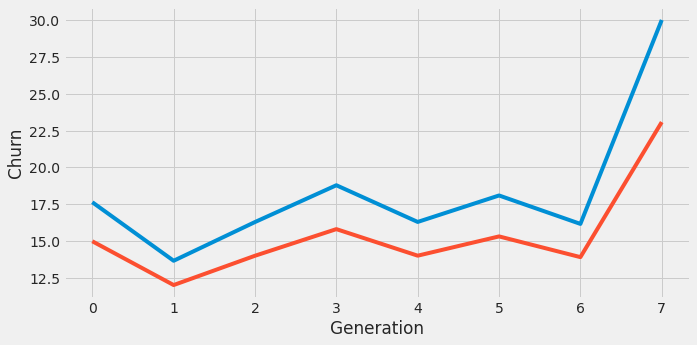

In [24]:
plt.figure(figsize=(10,5))
plt.plot(ratio)
plt.plot(ratio_all)
plt.xlabel('Generation')
plt.ylabel('Churn')
plt.show()

### <center>Инсайты:</center>
1. Клиенты, совершающие более 3-х звонков в call-центр, имеют разительно  более высокий процент оттока, Это может быть обусловлено тем, что большое кол-во звонков объясняется существованием серьезных проблем у звонящих клиентов, что сильно повышает вероятность их попадания в отток.  
В случаях с меньшим количеством звонков, чем 3, процент оттока остается стабильным на достаточно низком уровне (10%-15%), что подтверждает приведенную выше гипотезу.
2. Анализ единиц продолжительности жизни клиента показал, что увеличение данного показателя ведет к более интенсивному оттоку клиентов. 
Данная закономерность ожидаема и может говорить о том, что рассматриваемый клиентский продукт подвержен изменениям "моды".  
C шестого этапа жизни (из выделенных периодов в 30 единиц), заметно значительное увеличение интенсивности оттока.  
Это может быть обусловлено тем, что на этот момент клиент приобретает определенное отрицательное благо, либо теряет положительное.  
Например, теряет льготные условия обслуживания, которые предоставлялись ему в течение 6 этапов и т. п. 



### <center>Создание новых признаков</center>

Звонки по телефону - это целевая услуга, которая предоставляется абоненту,
поэтому пробуем рассчитать, сколько стоит гипотетическая "минута" (то есть без учета других услуг) разговора у абонента.

In [9]:
df['Cost of Minute'] = (df['Total day charge'] + 
                        df['Total eve charge'] +
                        df['Total night charge'] +
                        df['Total intl charge']) / (df['Total day minutes'] + 
                                                    df['Total eve minutes'] +
                                                    df['Total night minutes'] +
                                                    df['Total intl minutes'])

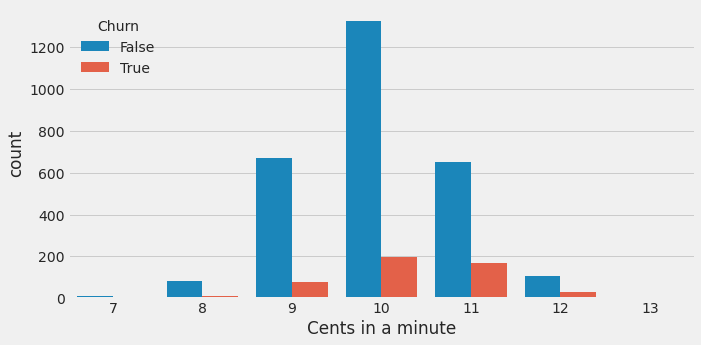

In [12]:
# Визуальный анализ нового признака
plt.figure(figsize=(10,5))
df['round'] = df['Cost of Minute'].apply(lambda x: int(round(x, 2) * 100))
sns.countplot(x='round', hue="Churn", data=df)
plt.xlabel('Cents in a minute');

In [13]:
true_generation = df[df['Churn'] == True].groupby('round')['Churn'].count()
false_generation = df[df['Churn'] == False].groupby('round')['Churn'].count()
ratio = true_generation / false_generation * 100
ratio_all = true_generation / (true_generation + false_generation) * 100

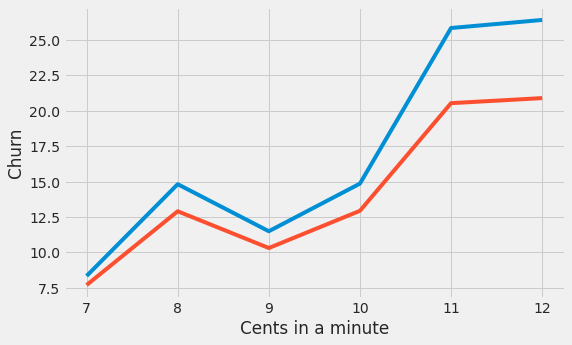

In [14]:
plt.figure(figsize=(8,5))
plt.plot(ratio)
plt.plot(ratio_all)
plt.xlabel('Cents in a minute')
plt.ylabel('Churn')
plt.show()

Анализ стоимости "минуты" показывает, что признак имеет важное значение.
При стоимости минуты больше 10 центов, вероятность попадания абонента в отток возрастает,
а при стоимости менее 7 центов за минуту - вероятность очень мала.

### <center>Отбор признаков</center>

In [15]:
# Маштабируем переменные
df['Phone number'] = df['Phone number'].apply(lambda s: int(s.replace("-", '')))
df_scale = preprocessing.scale(df)
df_scale = pd.DataFrame(df_scale)
df_scale.columns = df.columns

Для оценки важности признаков сделаем предсказание случайного леса с параметрами по умолчанию. Вместо кросс-валидации будем использовать Out-of-Bag оценку.

In [16]:
# Выделим обучающую выборку и целевую переменую 
X, y =  df_scale.drop(['Churn'], axis=1), df['Churn']

In [17]:
first_forest = RandomForestClassifier(n_estimators=1000, max_depth = 5, 
                                      oob_score=True, n_jobs=-1,
                                      random_state=42).fit(X, y)

In [18]:
# Посмотрим точность предсказания
print("Forest Score = {:.2%}".format(
        first_forest.oob_score_))

Forest Score = 89.47%


In [19]:
first_forest_predictions = first_forest.predict(X)
features = pd.DataFrame(first_forest.feature_importances_, index=X.columns,
                        columns=['Importance']).sort_values(by=['Importance'], ascending=False)
sprint(features.query('Importance > 0.02'))

,Importance
Total day charge,0.214808
Total day minutes,0.210913
Customer service calls,0.170481
Total eve minutes,0.059941
Total eve charge,0.058190
Number vmail messages,0.050460
Cost of Minute,0.043848
Total night charge,0.025124
Total night minutes,0.024485
Total intl minutes,0.022199


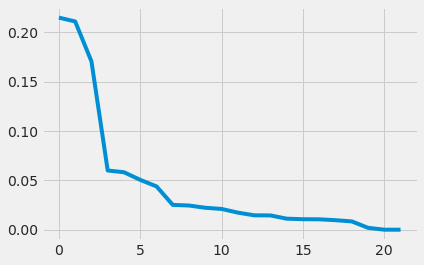

In [20]:
# Кривая оценок важности признаков
plt.plot(range(len(features.Importance.tolist())), 
         features.Importance.tolist());

Анализируя оценки важности можно сделать следующие выводы:
1. Ожидаемо вспомогаемые признаки Generation и round имеют малый вес. Также ожидаемо, что код штата и префикс номера имеют малый вес. Эти признаки не будут использоваться в обучающей выборке.
2. Показатели активности абонента с маленькими значениями, например: Account length, Total day calls и другие, все же могут вносить незначительные коррективы, поэтому удалятся не будут.

In [21]:
X = df[['Total day charge',
        'Total day minutes',
        'Customer service calls',
        'International plan',
        'Total eve minutes',
        'Total eve charge',
        'Cost of Minute',
        'Number vmail messages',
        'Total intl calls',
        'Total intl minutes',
        'Voice mail plan',
        'Total intl charge',
        'Total night minutes',
        'Total night charge',
        'Total day calls',
        'Total night calls',
        'Account length',
        'Total eve calls']]

### <center>Построение модели классификации</center>

In [22]:
# Разбиваем на тестовую и обучающую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Попробуем четыре разных классификатора: логистическую регрессию, метод ближайших соседей, Gradient boosting, Random Forest и SVM. Так как у нас сильный дисбаланс в выборке, то в качестве меры будем использовать F1 score.

In [27]:
# Настройка параметров выбранных алгоритмов с помощью GridSearchCV 
n_folds = 5
scores = []
fits = []
classifiers = [LogisticRegression(),
               KNeighborsClassifier(),
               GradientBoostingClassifier(), 
               RandomForestClassifier(), 
               SVC()]
classifiers_name = ['LogisticRegression',
                    'KNeighborsClassifier',
                    'GradientBoostingClassifier', 
                    'RandomForestClassifier', 
                    'SVC']
logistic_params = {'penalty': ('l1', 'l2'),
                   'C': (.01,.1,1,5)}
knn_params = {'n_neighbors': list(range(3, 12, 2))}
gbm_params = {'n_estimators': [100, 300, 500],
              'learning_rate':(0.1, 0.5, 1),
              'max_depth': list(range(3, 6)), 
              'min_samples_leaf': list(range(10, 31, 10))}
forest_params = {'n_estimators': [100, 300, 500],
                 'criterion': ('gini', 'entropy'), 
                 'max_depth': list(range(3, 6)), 
                 'min_samples_leaf': list(range(10, 31, 10))}

svm_param = {'kernel' : ('linear', 'rbf'), 'C': (.5, 1, 2)}
params = [logistic_params, knn_params, gbm_params, forest_params, svm_param]

### <center>Кросс-валидация</center>

In [47]:
from sklearn.metrics import f1_score
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)


for i, each_classifier in enumerate(classifiers):
    clf = each_classifier
    clf_params = params[i]
    grid = GridSearchCV(clf, clf_params, 
                        cv=kfold, verbose=1,
                        n_jobs=-1, scoring='roc_auc')
    grid.fit(X_train, y_train)
    fits.append(grid.best_params_)
    clf_best_score = grid.best_score_
    scores.append(clf_best_score)
#     print(classifiers_name[i], clf_best_score, "\n", grid.best_params_, "\n")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  1.6min finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   27.5s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.0min finished


In [48]:
grid_value = max(scores)
grid_index = [i for i in range(len(scores)) if scores[i]==grid_value][0]
print("Лучший классификатор при GridSearch:",
      classifiers_name[grid_index], grid_value)
print(fits[grid_index])

Лучший классификатор при GridSearch: GradientBoostingClassifier 0.8713472815196119
{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 30, 'n_estimators': 100}


In [52]:
clf_params = {'n_estimators': (300, 350, 400), 
              'learning_rate': (0.1, 0.3, 0.5, 0.75, 1), 
              'min_samples_leaf': list(range(1, 14, 3))}

clf = classifiers[grid_index]
grid = GridSearchCV(clf, clf_params, 
                    cv=kfold, verbose=1,
                    n_jobs=-1, scoring='roc_auc')
grid.fit(X_train, y_train)
clf_best_score = grid.best_score_
clf_best_params = grid.best_params_
clf_best = grid.best_estimator_
mean_validation_scores = []
print("Лучший результат", clf_best_score, 
      "лучшие параметры", clf_best_params)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  1.3min finished


Лучший результат 0.8695996431701944 лучшие параметры {'learning_rate': 0.1, 'min_samples_leaf': 1, 'n_estimators': 350}


In [38]:
clf_params = {'n_estimators': (300, 350, 400), 
              'learning_rate': (0.1, 0.3, 0.5, 0.75, 1), 
              'min_samples_leaf': list(range(1, 14, 3))}

clf = classifiers[grid_index]
grid = GridSearchCV(clf, clf_params, cv=n_folds, 
                    n_jobs=-1, scoring="f1")
grid.fit(X_train, y_train)
clf_best_score = grid.best_score_
clf_best_params = grid.best_params_
clf_best = grid.best_estimator_
mean_validation_scores = []
print("Лучший результат", clf_best_score, 
      "лучшие параметры", clf_best_params)

Лучший результат 0.825307154892 лучшие параметры {'learning_rate': 0.3, 'min_samples_leaf': 4, 'n_estimators': 400}


### <center>Построение кривых валидации и обучения</center>

In [53]:
def plot_with_std(x, data, **kwargs):
        mu, std = data.mean(1), data.std(1)
        lines = plt.plot(x, mu, '-', **kwargs)
        plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                         facecolor=lines[0].get_color(), alpha=0.2)
        
def plot_learning_curve(clf, X, y, scoring, cv=5):
 
    train_sizes = np.linspace(0.05, 1, 20)
    n_train, val_train, val_test = learning_curve(clf,
                                                  X, y, train_sizes, cv=cv,
                                                  scoring=scoring)
    plot_with_std(n_train, val_train, label='training scores', c='green')
    plot_with_std(n_train, val_test, label='validation scores', c='red')
    plt.xlabel('Training Set Size'); plt.ylabel(scoring)
    plt.legend()

def plot_validation_curve(clf, X, y, cv_param_name, 
                          cv_param_values, scoring):

    val_train, val_test = validation_curve(clf, X, y, cv_param_name,
                                           cv_param_values, cv=5,
                                                  scoring=scoring)
    plot_with_std(cv_param_values, val_train, 
                  label='training scores', c='green')
    plot_with_std(cv_param_values, val_test, 
                  label='validation scores', c='red')
    plt.xlabel(cv_param_name); plt.ylabel(scoring)
    plt.legend()

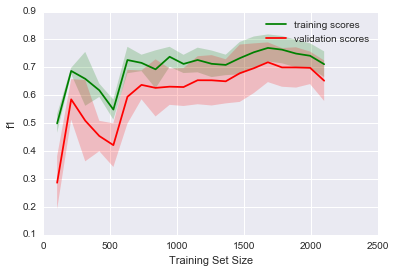

In [44]:
# Кривая обучения
plot_learning_curve(GradientBoostingClassifier(n_estimators=2, 
                    learning_rate=1.5, min_samples_leaf=7),
                   X_train, y_train, scoring='f1', cv=10)

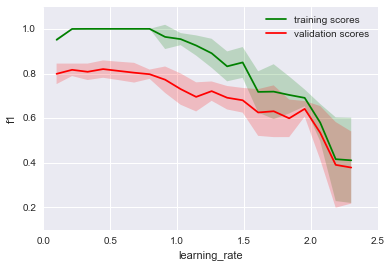

In [46]:
# Кривая валидации
learning_rates = np.linspace(0.1, 2.3, 20)
plot_validation_curve(GradientBoostingClassifier(n_estimators=250, 
                    min_samples_leaf=7), X_train, y_train, 
                    cv_param_name='learning_rate', 
                    cv_param_values=learning_rates,
                    scoring='f1')

### <center>Финальный прогноз для отложенной выборки</center>

In [50]:
final_gbm = GradientBoostingClassifier(n_estimators=300, 
                    min_samples_leaf=10, learning_rate=0.1, max_depth=4)
final_gbm.fit(X_train, y_train)
final_pred = final_gbm.predict(X_test)
accuracy_score(y_test, final_pred), f1_score(y_test, final_pred)

(0.95899999999999996, 0.82403433476394838)

### <center>Оценка модели с описанием выбранной метрики</center>

Построена модель предсказания, уйдет ли абонент телеком-копмании в отток. Модель предсказывает с 96%-ной долей правильных ответов на отложенных 30% выборки. Но accuracy не очень хорошо характеризует качество модели из-за сильного дисбаланса в целевой переменной (~85% против ~15%), поэтому в качестве целевой была выбрана метрика F1-score. На отложенной выборке удалось добиться хорошего результата F1=0.82. Построены кривые обучения и валидационные кривые. Видно, что увеличение количества примеров более 1700 не приносит существенной выгоды (у нас в обучающей выборке более 3000 примеров).

## <center>Общие выводы</center>

По результатам проведенного анализа, можно увидеть, что есть определенные зависимости и признаки показателя оттока. 
Наблюдаются определенные закономерности - продолжительность звонков в определенное время суток, международные звонки, сумма оплаты разговоров. 
Имеет влияние количество обращений клиентами в сервисный центр - совершающие более 3-х звонков с большей вероятностью попадут в отток. 
Также прямое отношение в показателю оттока имеет срок жизни клиента - клиенты со сроком жизни более 6-ти отрезков времени по 30 единиц имеют больший риск попасть в отток. 
Выявленным признаком оттока является стоимость минуты разговора клиента - минимальная вероятность попадания клиента в отток наблюдается при стоимости минуты разговора клиента при 7 центах. С наибольшей вероятностью клиент покинет компанию при стоимости в 10 центов и более.